In [1]:
import pandas as pd
import glob, re

In [2]:
records = []
for score_filename in glob.glob('scores/*.txt'):
    record = {}
    score_file = open(score_filename, 'r')
    run = re.match('scores/score-(.+).txt', score_filename).group(1)
    record["run"] = run
    for score in score_file.readlines():
        pair = score.strip().split(':')
        record[pair[0]] = float(pair[1])
    records.append(record)


In [3]:
records

[{'run': 'gpt-4-2023-12-27',
  'aware_acc': 0.7684630738522954,
  'aware_rho': 0.6054366931621086,
  'agnostic_acc': 0.8076152304609219,
  'agnostic_rho': 0.6739981667877566},
 {'run': 'gpt-3.5-turbo-2024-01-09',
  'aware_acc': 0.7125748502994012,
  'aware_rho': 0.5417773426326843,
  'agnostic_acc': 0.7254509018036072,
  'agnostic_rho': 0.549039533895501},
 {'run': 'gpt-4-2024-01-09',
  'aware_acc': 0.7624750499001997,
  'aware_rho': 0.5559414546829756,
  'agnostic_acc': 0.8016032064128257,
  'agnostic_rho': 0.6795212892380292},
 {'run': 'mistral-baseline',
  'aware_acc': 0.7065868263473054,
  'aware_rho': 0.46095769289667354,
  'agnostic_acc': 0.6492985971943888,
  'agnostic_rho': 0.3801408906585249},
 {'run': 'gpt-3.5-turbo-persona-examples-2024-01-10',
  'aware_acc': 0.7125748502994012,
  'aware_rho': 0.5246078972695487,
  'agnostic_acc': 0.6713426853707415,
  'agnostic_rho': 0.49368790263152557},
 {'run': 'gpt-3.5-turbo-persona-2024-01-10',
  'aware_acc': 0.720558882235529,
  'awar

In [12]:
df = pd.DataFrame.from_records(records)
df_agnostic_acc = df[['run', 'agnostic_acc']].sort_values(by='agnostic_acc')

<Axes: ylabel='run'>

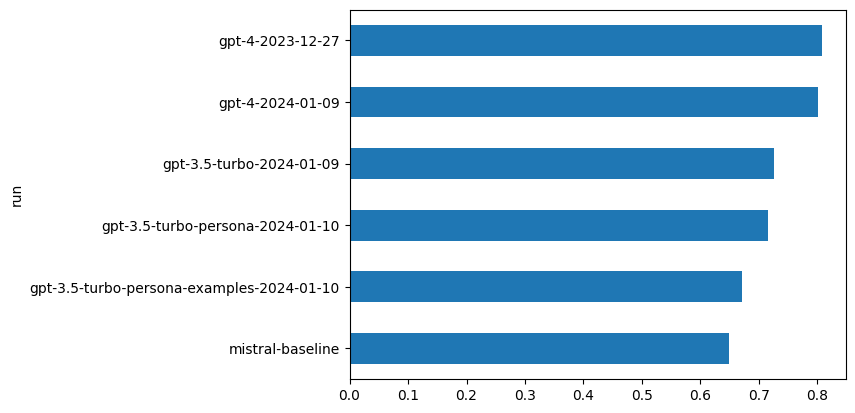

In [16]:
df_agnostic_acc.plot(kind='barh', x='run', legend=False)